In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

In [53]:
'''
ml-latest-small:
    100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.
    
    All ratings are contained in the file `ratings.csv`. Each line of this file after the header row 
    represents one rating of one movie by one user, and has the following format:
    userId,movieId,rating,timestamp
    
    The lines within this file are ordered first by userId, then, within user, by movieId.

    Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

    Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
'''

'\nml-latest-small:\n    100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.\n    \n    All ratings are contained in the file `ratings.csv`. Each line of this file after the header row \n    represents one rating of one movie by one user, and has the following format:\n    userId,movieId,rating,timestamp\n    \n    The lines within this file are ordered first by userId, then, within user, by movieId.\n\n    Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).\n\n    Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.\n'

# Data importing

In [54]:
links = pd.read_csv("data/ml-latest-small/links.csv");
movies = pd.read_csv("data/ml-latest-small/movies.csv");
ratingscsv = pd.read_csv("data/ml-latest-small/ratings.csv");
tags = pd.read_csv("data/ml-latest-small/tags.csv");

In [55]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [56]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [57]:
print("Columns for links.csv: {}".format(list(links.columns)))
print("Columns for movies.csv: {}".format(list(movies.columns)))
print("Columns for ratings.csv: {}".format(list(ratingscsv.columns)))
print("Columns for tags.csv: {}".format(list(tags.columns)))

Columns for links.csv: ['movieId', 'imdbId', 'tmdbId']
Columns for movies.csv: ['movieId', 'title', 'genres']
Columns for ratings.csv: ['userId', 'movieId', 'rating', 'timestamp']
Columns for tags.csv: ['userId', 'movieId', 'tag', 'timestamp']


# Data Visualization/Exploration

In [58]:
'''
checking out movies.csv stuff
Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.l
'''

#movies['genres'].unique()
uniqueGenres = set()
#checking out how many unique gengres there are. Movies can fall under multiple so we need to split them
for row in movies.itertuples():
    tempGenres = row.genres
    splitGenres = tempGenres.split("|")
    for genre in splitGenres:
        uniqueGenres.add(genre)
print(len(uniqueGenres))
print(uniqueGenres)
    


20
{'Mystery', 'Adventure', 'IMAX', 'Animation', 'Comedy', 'Crime', 'Horror', 'Documentary', 'Film-Noir', 'Musical', 'Action', '(no genres listed)', 'Sci-Fi', 'Western', 'Fantasy', 'Romance', 'Children', 'Thriller', 'War', 'Drama'}


In [59]:
'''
checking out tags.csv stuff
'''
uniqueTags = set ()
print("")
for row in tags.itertuples():
    tempTags = row.tag
    uniqueTags.add(tempTags)
print(len(uniqueTags))
print(uniqueTags)




1589
{'Grace', 'wizards', 'unlikely hero', 'golf', 'Seth Rogen', 'small time criminals', 'grim', 'Philip Seymour Hoffman', 'steve carell', 'Maggie Gyllenhaal', 'secret society', 'tobacco', 'TERRORISM', 'Black comedy', 'movies about movies', 'plastic surgery', 'harry potter', 'R language', 'casual violence', 'doctors', 'tension building', 'time-travel', 'good soundtrack', 'wry', 'Justin Timberlake', 'luke skywalker', 'justice', 'serial killer', 'prom', 'monologue', 'unsettling', 'computer', 'Philip K. Dick', 'Rosebud', 'quick cuts', 'Creature Feature', 'planes', 'writing', 'multiple storylines', 'voyeurism', 'Mel Gibson', 'drug overdose', 'evil children', 'immortality', 'Veterinarian', 'quotable', 'Klingons', 'crime scene scrubbing', 'best comedy', 'Steve Buscemi', 'Hearst', 'Up series', 'Empire State Building', 'Tolkein', 'pool', 'camels', 'diner', 'off-beat comedy', 'space craft', 'Bittersweet', 'organized crime', 'big name actors', 'mining', 'Something for everyone in this one... sa

In [60]:
'''
checking out ratings.csv stuff
'''
uniqueRatings = set()
#checking out what kind of ratings there are
for row in ratingscsv.itertuples():
    rating = row.rating
    uniqueRatings.add(rating)
print (uniqueRatings)


{0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 4.5, 3.5, 2.5, 1.5}


In [61]:
print(len(ratingscsv.userId.unique()))
#(ratings.userId.unique())
print(len(tags.userId.unique()))

610
58


In [62]:
movieRatings= pd.merge(movies,ratingscsv, on ='movieId')
movieTags = pd.merge(movies, tags, on= 'movieId')
movieRatings.head()


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [63]:
#print(movieRatings.userId.unique())
print(len(movieRatings.userId.unique()))

610


In [64]:
movieTags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [65]:
moveTagRating = pd.merge(movieRatings,movieTags, on= 'userId')

In [66]:
moveTagRating.head()


,movieId_x,title_x,genres_x,userId,rating,timestamp_x,movieId_y,title_y,genres_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,48516,"Departed, The (2006)",Crime|Drama|Thriller,way too long,1169687325
1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,7,4.5,1106635993,48516,"Departed, The (2006)",Crime|Drama|Thriller,way too long,1169687325
2,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,7,3.0,1106635520,48516,"Departed, The (2006)",Crime|Drama|Thriller,way too long,1169687325
3,150,Apollo 13 (1995),Adventure|Drama|IMAX,7,4.5,1106635925,48516,"Departed, The (2006)",Crime|Drama|Thriller,way too long,1169687325
4,165,Die Hard: With a Vengeance (1995),Action|Crime|Thriller,7,4.0,1106635987,48516,"Departed, The (2006)",Crime|Drama|Thriller,way too long,1169687325


In [67]:
#goes with the above findings. 
print(len(moveTagRating.userId.unique()))

58


Content-Based vs Collaborative filtering

1. Collaborative Recommendation: is based on the preference of other users. A simple example would be recommending a movie to a user based on the fact that their friend liked the movie.
    * Memory Based:
        - User-Based Collaborative filtering:  In this model products are recommended to a user based on the fact that the products have been liked by users similar to the user. 
        - Item Based: These systems identify similar items based on users’ previous ratings.
    * Model Based: 
       - methods are based on matrix factorization and are better at dealing with sparsity. They are developed using data mining, machine learning algorithms to predict users’ rating of unrated items.
    
2. Content-Based: use meta data such as genre, producer, actor, musician to recommend items say movies or music. Such a recommendation would be for instance recommending Infinity War that featured Vin Disiel because someone watched and liked The Fate of the Furious

# Test1

In [17]:
'''
Test 1
move with rating 
movieRatings
Simple item similarity based recommender system
'''

movieRatings.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [18]:
movieRatings.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [19]:
#getting average rating per movie. Grouping them by title and getting mean
ratings = pd.DataFrame(movieRatings.groupby('title')['rating'].mean())
ratings.head(10)

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
'Tis the Season for Love (2015),1.500000
"'burbs, The (1989)",3.176471
'night Mother (1986),3.000000
(500) Days of Summer (2009),3.666667


In [20]:
ratings['#OfRatings'] = movieRatings.groupby('title')['rating'].count()
ratings.head(10)

,rating,#OfRatings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
'Tis the Season for Love (2015),1.500000,1
"'burbs, The (1989)",3.176471,17
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.666667,42


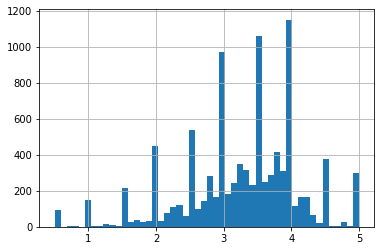

In [21]:

ratings['rating'].hist(bins = 50)

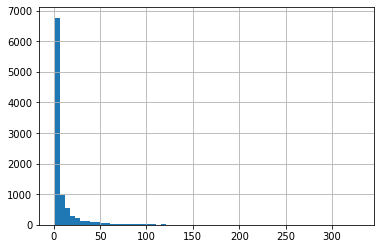

In [22]:
ratings['#OfRatings'].hist(bins = 60)

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/user/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


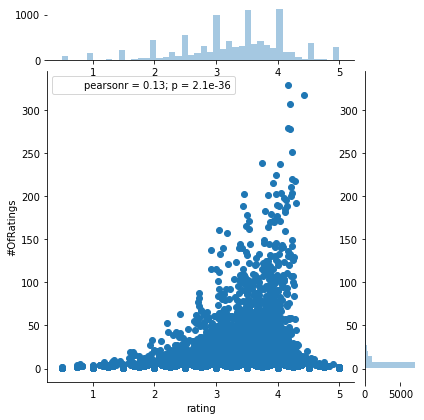

In [23]:
sns.jointplot(x='rating', y='#OfRatings', data=ratings)

In [24]:
movie_matrix = movieRatings.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [25]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']
AFO_user_rating.head(10)


userId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: Air Force One (1997), dtype: float64

In [26]:
testAFO = AFO_user_rating
testAFO = testAFO[testAFO.notnull()]
testAFO.head(10)


userId
11    4.0
18    3.0
28    2.0
42    4.0
45    4.0
51    3.0
57    3.0
68    3.0
82    3.5
91    3.0
Name: Air Force One (1997), dtype: float64

In [27]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/user/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [28]:
#Should be similar
print(similar_to_air_force_one['Contact (1997)'])
print(similar_to_contact['Air Force One (1997)'])
similar_to_air_force_one.head()

0.46845514589654386
0.4684551458965438


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [29]:
#grabing the old dataframe and renaming empty column to correlation
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
#dropping any moving with NaN values
corr_contact.dropna(inplace=True)
corr_contact.head()


,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [30]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
print(corr_AFO.count())
corr_AFO.head()


correlation    3381
dtype: int64


,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [31]:
corr_AFO = corr_AFO.join(ratings['#OfRatings'])
corr_contact = corr_contact.join(ratings['#OfRatings'])
corr_AFO .head()


,correlation,#OfRatings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [32]:
corr_contact.head()

,Correlation,#OfRatings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [33]:
#at least 100 ratings
newDF = corr_AFO[corr_AFO['#OfRatings'] > 100].sort_values(by='correlation', ascending=False)
print(newDF.count())
newDF.head()

correlation    134
#OfRatings     134
dtype: int64


,correlation,#OfRatings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107


In [34]:
corr_contact[corr_contact['#OfRatings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,#OfRatings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144


# Test 2

In [35]:
'''
Test 2
Cosine User-Similarity
We can add the other 2 similaraiies later
'''
movie_matrix2 = movie_matrix #making a copy so we dont mess with the original one above
movie_matrix2.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
cos(a,b) = \frac{A \cdot B} {||a||||b||}  \frac{\sum_{i} a_i * b_i} {\sqrt{\sum_i a^2_i} * \sqrt{\sum_i b^2_i}}
$$

In [36]:
mean = movie_matrix2.mean(axis = 1)
movie_matrix2_1 = movie_matrix2
#https://stackoverflow.com/questions/26081300/pandas-subtract-row-mean-from-each-element-in-row
movie_matrix2_1 = movie_matrix2_1.sub(mean,axis= 0)
#set to 0 after mean calc so it doesnt effect calculations
movie_matrix2_1 = movie_matrix2_1.fillna(0)
movie_matrix2_1.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366379,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [37]:
topPart = np.dot(movie_matrix2_1.values, movie_matrix2_1.values.T)

bottomLeftPart = np.linalg.norm(movie_matrix2_1.values, axis = 1)
bottomRightPart = np.linalg.norm(movie_matrix2_1.values.T, axis = 0)

#Compute the outer product of two vectors. 
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html
bottomPart = np.outer(bottomLeftPart,bottomRightPart)

cosine_Distance = topPart / bottomPart

#using the similiarity equation from slides
cosine = .5 + (.5*cosine_Distance)

cosineSimiliarityMatrix = pd.DataFrame(data= cosine, columns = movie_matrix2_1.index, index = movie_matrix2_1.index)

cosineSimiliarityMatrix.head()


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.500632,0.500276,0.524209,0.510923,0.477251,0.496900,0.523506,0.509755,0.495623,...,0.509063,0.491414,0.492390,0.481471,0.485439,0.506008,0.527631,0.537612,0.487144,0.505466
2,0.500632,1.000000,0.500000,0.491418,0.510898,0.489474,0.494443,0.475957,0.500000,0.501506,...,0.474724,0.484210,0.499156,0.500000,0.500000,0.503113,0.489748,0.497000,0.469955,0.512500
3,0.500276,0.500000,1.000000,0.494370,0.484231,0.502400,0.500000,0.483764,0.500000,0.500000,...,0.497548,0.491941,0.508874,0.500000,0.499285,0.481356,0.496105,0.493500,0.500000,0.509775
4,0.524209,0.491418,0.494370,1.000000,0.485190,0.506978,0.529046,0.501032,0.497063,0.525795,...,0.481156,0.531561,0.513820,0.493109,0.520019,0.510295,0.507314,0.481215,0.491058,0.499503
5,0.510923,0.510898,0.484231,0.485190,1.000000,0.504556,0.505059,0.493858,0.500000,0.483417,...,0.507982,0.506213,0.513538,0.506231,0.481864,0.513160,0.515948,0.499124,0.546914,0.499861


# test 3 Jaccard Similarity


In [38]:
'''
Test 3
Jaccar User-Similarity

'''
jaccard_Matrix = movie_matrix #making a copy so we dont mess with the original one above
jaccard_Matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
    Jaccard(a,b) = \frac {|U_a \cap U_b |}{  |U_a \cup U_b |}
$$

In [39]:
# 3>= good (1) else (0) bad
jaccard_Matrix = jaccard_Matrix.fillna(0)# Set any nonzero value to 1
jaccard_Matrix = jaccard_Matrix.where(lambda x: x>=3,0 ) # setting values = 0 when original value is less than 3
jaccard_Matrix = jaccard_Matrix.where(lambda x: x<3,1)  #setting values = 1 when origianl valu is more than 3
jaccard_Matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe

jac_sim = 1 - pairwise_distances(jaccard_Matrix.values, metric = "hamming")
jac_sim = pd.DataFrame(data = jac_sim, index=jaccard_Matrix.index, columns=jaccard_Matrix.index)

In [41]:
jac_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.974380,0.975512,0.966149,0.975100,0.952876,0.970779,0.975203,0.974277,0.965840,...,0.968618,0.969750,0.915012,0.969338,0.963988,0.889186,0.969956,0.937751,0.974792,0.871489
2,0.974380,1.000000,0.995370,0.980039,0.993312,0.967383,0.986727,0.993003,0.993724,0.986521,...,0.989094,0.985287,0.917996,0.987344,0.978702,0.896286,0.979525,0.939294,0.993621,0.881469
3,0.975512,0.995370,1.000000,0.980965,0.994032,0.967898,0.987447,0.993724,0.994650,0.986830,...,0.987756,0.986007,0.918922,0.988270,0.979833,0.896389,0.980451,0.939191,0.994341,0.879720
4,0.966149,0.980039,0.980965,1.000000,0.980759,0.956065,0.974997,0.979216,0.979525,0.972322,...,0.974071,0.973557,0.922523,0.973969,0.966972,0.895462,0.969030,0.931680,0.979422,0.871798
5,0.975100,0.993312,0.994032,0.980759,1.000000,0.971602,0.986624,0.994753,0.992386,0.984978,...,0.986315,0.988682,0.919951,0.989299,0.979628,0.898035,0.980451,0.940220,0.994135,0.879309


In [42]:
jac_sim2 = 1 - pairwise_distances(jaccard_Matrix.T, metric = "hamming")
jac_sim2 = pd.DataFrame(data = jac_sim2, index=jaccard_Matrix.columns, columns=jaccard_Matrix.columns)


In [43]:
jac_sim2.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.996721,0.995082,0.996721,0.995082,0.998361,0.978689,0.996721,0.945902,0.988525,...,0.998361,0.988525,0.996721,0.998361,0.996721,0.967213,0.972131,0.998361,0.968852,0.998361
'Hellboy': The Seeds of Creation (2004),0.996721,1.000000,0.998361,0.996721,0.995082,0.998361,0.978689,0.996721,0.942623,0.988525,...,0.998361,0.985246,0.993443,0.995082,0.996721,0.967213,0.972131,0.998361,0.968852,0.998361
'Round Midnight (1986),0.995082,0.998361,1.000000,0.995082,0.993443,0.996721,0.980328,0.995082,0.940984,0.986885,...,0.996721,0.983607,0.991803,0.993443,0.995082,0.965574,0.970492,0.996721,0.967213,0.996721
'Salem's Lot (2004),0.996721,0.996721,0.995082,1.000000,0.998361,0.998361,0.978689,0.996721,0.942623,0.988525,...,0.998361,0.985246,0.993443,0.995082,0.996721,0.967213,0.972131,0.998361,0.968852,0.998361
'Til There Was You (1997),0.995082,0.995082,0.993443,0.998361,1.000000,0.996721,0.977049,0.995082,0.940984,0.986885,...,0.996721,0.983607,0.991803,0.993443,0.995082,0.965574,0.970492,0.996721,0.967213,0.996721


# Test 4 Pearson Correlation 

In [44]:
'''
Pearson Correlation Similarity Matrix
'''
pearson_Matrix = movie_matrix #making a copy so we dont mess with the original one above
pearson_Matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$$
    \frac{Cov(a,b)}{std(a)*std(b)} =\frac{(a_i - \hat a) (b_i - \hat b )} {\sqrt{\sum_i (a_i - \hat a)^2} * \sqrt{\sum_i (b_i - \hat b )}}  
$$
similarity(a,b) = 0.5 + 0.5 * pearson(a,b)

In [45]:
pearson_Matrix = pearson_Matrix.fillna(0)

test = pearson_Matrix.corr(method = 'pearson')


In [46]:
pearsonSim = 0.5 + (0.5 * test)

In [47]:
pearsonSim.head()



title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.499179,0.498838,0.499179,0.498873,0.499179,0.496797,0.499179,0.567971,0.497838,...,0.499179,0.669968,0.771124,0.853263,0.499179,0.496162,0.567164,0.662644,0.495907,0.499179
'Hellboy': The Seeds of Creation (2004),0.499179,1.000000,0.853263,0.499179,0.498873,0.499179,0.496797,0.499179,0.494716,0.497838,...,0.499179,0.497706,0.498596,0.498838,0.499179,0.496162,0.496128,0.498203,0.495907,0.499179
'Round Midnight (1986),0.498838,0.853263,1.000000,0.498838,0.498405,0.498838,0.585099,0.498838,0.492521,0.496939,...,0.498838,0.496752,0.498013,0.498355,0.498838,0.494568,0.494520,0.497456,0.494207,0.498838
'Salem's Lot (2004),0.499179,0.499179,0.498838,1.000000,0.928635,0.499179,0.496797,0.499179,0.494716,0.497838,...,0.499179,0.497706,0.498596,0.498838,0.499179,0.496162,0.496128,0.498203,0.495907,0.499179
'Til There Was You (1997),0.498873,0.498873,0.498405,0.928635,1.000000,0.498873,0.495602,0.498873,0.492745,0.497031,...,0.498873,0.496850,0.498072,0.498405,0.498873,0.494731,0.494684,0.497533,0.494381,0.498873


In [48]:
pearson_Matrix2 = pearson_Matrix.fillna(0)

test2 = pearson_Matrix.T.corr(method = 'pearson')

In [49]:
pearsonSim2 = 0.5 + (0.5 * test2)

In [50]:
pearsonSim2.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.509698,0.526526,0.588455,0.560431,0.552203,0.571892,0.564271,0.527632,0.499846,...,0.533124,0.574967,0.593480,0.528261,0.567201,0.560979,0.627096,0.631113,0.542715,0.549347
2,0.509698,1.000000,0.498702,0.498096,0.506591,0.508126,0.510782,0.511874,0.498275,0.530938,...,0.599273,0.505442,0.497981,0.497326,0.496038,0.505645,0.502905,0.516362,0.512186,0.544661
3,0.526526,0.498702,1.000000,0.497720,0.500943,0.497709,0.497182,0.500851,0.498444,0.497248,...,0.500074,0.499706,0.505602,0.497588,0.501837,0.498373,0.506441,0.504045,0.498518,0.507977
4,0.588455,0.498096,0.497720,1.000000,0.560507,0.532854,0.550297,0.527115,0.501206,0.507804,...,0.536421,0.557140,0.640926,0.519846,0.532742,0.582406,0.557555,0.558422,0.511963,0.531249
5,0.560431,0.506591,0.500943,0.560507,1.000000,0.647067,0.550861,0.713287,0.497906,0.511734,...,0.530954,0.707465,0.547693,0.627058,0.570536,0.545074,0.572880,0.561300,0.629144,0.520180


# TODO

    2. Rewrite all of this with comments
    3. Video
    4. github

In [68]:
#pd.merge(ratings,tags, on= 'userId')
print("Columns for ratings.csv: {}".format(list(ratingscsv.columns)))
print("Columns for tags.csv: {}".format(list(tags.columns)))

Columns for ratings.csv: ['userId', 'movieId', 'rating', 'timestamp']
Columns for tags.csv: ['userId', 'movieId', 'tag', 'timestamp']


In [98]:
dropTags = tags.drop(columns = ['userId','timestamp'])
cleanRatings = pd.DataFrame(movieRatings.groupby(['title','movieId'])['rating'].mean())

cleanTags = dropTags.groupby('movieId')['tag'].apply(lambda tags: ','.join(tags))
dfCleanTags = cleanTags.to_frame()


df = pd.merge(cleanRatings,dfCleanTags, on ='movieId')
df.head()


,rating,tag
movieId,,
69757,3.666667,"artistic,Funny,humorous,inspiring,intelligent,..."
3420,3.166667,lawyers
152077,3.678571,"creepy,suspense"
2572,3.527778,Shakespeare sort of
1367,3.074468,"dogs,remake"


In [84]:
cleanRatings.head(20)


,,rating
title,movieId,
'71 (2014),117867,4.000000
'Hellboy': The Seeds of Creation (2004),97757,4.000000
'Round Midnight (1986),26564,3.500000
'Salem's Lot (2004),27751,5.000000
'Til There Was You (1997),779,4.000000
'Tis the Season for Love (2015),149380,1.500000
"'burbs, The (1989)",2072,3.176471
'night Mother (1986),3112,3.000000
(500) Days of Summer (2009),69757,3.666667
